## Esercitazione 8  del    23 Aprile 2024


## Condizionamento del problema della soluzione di un sistema lineare

# Esercizio 1
- Costruire la matrice di Vandermonde A, generata dal vettore x=[1.0,2.0,...,6.0] utilizzando la funzione np.vander(x, increasing=True) di numpy. 
- Calcolarne l'indice di condizionamento in norma infinito senza utilizzare la funzione cond di numpy.linalg e poi confrontarne il valore con quello ottenuto utilizzando la funzione.
- Considerare il sistema lineare Ax=b  con matrice dei coefficienti A e termine noto costruito in maniera tale che la soluzione esatta sia il vettore x=[1,1,1,1,1,1] (ogni sua componente è 1) e risolverlo usando il metodo solve del modulo linalg di Scipy.
- perturbare il vettore dei termini noti della quantità
- 
$$
\delta b = 0.025 \, \ast \,
\left [
\begin{array}{c}
1\\
0\\
0\\
0
\end{array}
\right ]
$$
- Risolvere il sistema con termine noto pertubato $b + \delta b$ ((usando il metodo solve del modulo linalg di Scipy).
- Calcolare l'errore relativo sul termine noto e l'errore relativo sulla soluzione. Cosa si può concludere?

N.B. per il calcolo dell'inversa della matrice di A usare la funzione di numpy.linalg.inv(A).


In [2]:
import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl
import matplotlib.pyplot as plt

In [3]:
#Calcolo della norma infinito
def mynorma_inf(B):
    c=np.sum(np.abs(B),axis=1)  #equivale a sommare gli elementi di tutte le colonne
    #(che equivale a fare la somma degli elementi di ogni riga)
    n_inf=np.max(c)
    return n_inf

In [4]:
x=np.arange(1.0,7.0)
A=np.vander(x, increasing=True)
print(A)
mycond=mynorma_inf(A)*mynorma_inf(np.linalg.inv(A))
print("mycond {:e}".format(mycond))
condp=np.linalg.cond(A,np.inf)
print("condizionamento in norma infinito con numpy {:e}".format(condp))

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01 2.430e+02]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02 1.024e+03]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02 3.125e+03]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03 7.776e+03]]
mycond 1.204321e+06
condizionamento in norma infinito con numpy 1.204321e+06


In [5]:
#Costruisco il termine noto in maniera tale che la soluzione sia il vettore unitario
b=np.sum(A,axis=1).reshape(6,1) #Calcolo la somma degli elementi di ogni riga 
#Con la scelta di questo termine noto la soluzione esatta è il vettore di tutti 1.
print(b)

[[6.000e+00]
 [6.300e+01]
 [3.640e+02]
 [1.365e+03]
 [3.906e+03]
 [9.331e+03]]


In [6]:
bp=b.copy()
bp[0]=bp[0]+0.025  #Perturbo l'elemento di posizione 0 del termine noto di una quantità pari a 0.025
errore_dati=np.linalg.norm(bp-b,np.inf)/np.linalg.norm(b,np.inf)
print("errore dati ",errore_dati)

errore dati  2.679241238881187e-06


In [7]:
xesatta= np.ones((6,1))  #Soluzione esatta
xp=spl.solve(A,bp)
print("Soluzione esatta sistema senza perturbazione \n ",xesatta)
print("Soluzione sistema con termine noto perturbato\n ",xp)
errore_soluzione=np.linalg.norm(xp-xesatta,np.inf)/np.linalg.norm(xesatta,np.inf)
print("errore soluzione ",errore_soluzione)
#Ad un errore relativo sui dati pari a 2.67 e-06, corrisponde un errore relativo sulla soluzione di 0.2175.
#Questo dipende dal fatto che il problema della soluzione del sistema lineare con la matrice A come nell'esercizio 
#è mal condizionato, quindi piccole perturbazioni sui dati vengono amplificate sulla soluzione
#l'elevato indice di condizionamento della matrice A, che abbiamo visto essere 1.281105e+06 conferma la precedente.
#Infatti abbiamo detto a lezione che l'indice di condizionamento della matrice A rappresenta un fattore di amplificazione
#sulla soluzione di piccoli errori sui dati

Soluzione esatta sistema senza perturbazione 
  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Soluzione sistema con termine noto perturbato
  [[1.15      ]
 [0.7825    ]
 [1.12083333]
 [0.96770833]
 [1.00416667]
 [0.99979167]]
errore soluzione  0.21749999998442493


## Esercizio 2
Assegnato il sistema lineare $Ax = b$, con
$$
A =
\left [
\begin{array}{ccc}
6 & 63 & 662.2\\
63 & 662.2 & 6967.8\\
662.2 & 6967.8 & 73393.5664
\end{array}
\right ], \qquad
b =
\left [
\begin{array}{c}
1.1\\
2.33\\
1.7
\end{array}
\right ]
$$
- trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
- perturbare la matrice dei coefficienti della quantità
$$
\delta A =
0.01 \, \ast \,
\left [ \begin{array}{ccc}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}
\right ]
$$
quindi calcolare l'errore relativo sulla soluzione e confrontarlo con la
perturbazione relativa sui dati di ingresso. Cosa si osserva?

In [29]:
#Esempi di sistemi malcondizionati


A=np.array([[6, 63, 662.2],[63, 662.2, 6967.8],[662.2, 6967.8, 73393.5664]])
b=np.array([1.1, 2.33, 1.7])

KA= npl.cond(A,np.inf)
print("Indice di condizionamento di A {:e}".format(KA))
x=spl.solve(A,b)
print(x)

#perturbare la matrice
 
A1=A.copy()
A1[0,0]=A[0,0]+0.01
x_per=spl.solve(A1,b)
print(x_per)


#Errore relativo sui dati
err_dati=npl.norm(A-A1,np.inf)/npl.norm(A,np.inf)

print("Errore relativo sui dati ", err_dati)
print("Errore relativo sui dati  in percentuale ", err_dati*100,"%")

err_rel_sol=npl.norm(x_per-x,np.inf)/npl.norm(x,np.inf)
print("Errore relativo sulla soluzione ", err_rel_sol)
print("Errore relativo sulla soluzione  in percentuale ", err_rel_sol*100,"%")
#Ad un errore relativo sui dati pari a 1.23 e-07, corrisponde un errore relativo sulla soluzione di 0.9995.
#Questo dipende dal fatto che il problema della soluzione del sistema lineare con la matrice A come nell'esercizio 
#è mal condizionato, quindi piccole perturbazioni sui dati vengono amplificate sulla soluzione
#l'elevato indice di condizionamento della matrice A, che abbiamo visto essere 1.975302e+010 conferma la precedente affermazione.
#Infatti abbiamo detto a lezione che l'indice di condizionamento della matrice A rappresenta un fattore di amplificazione
#sulla soluzione di piccoli errori sui dati

Indice di condizionamento di A 1.975302e+10
[136422.33746479 -25999.49954686   1237.44419611]
[67.09867276 -9.66739506  0.3124175 ]
Errore relativo sui dati  1.2342088165597937e-07
Errore relativo sui dati  in percentuale  1.2342088165597937e-05 %
Errore relativo sulla soluzione  0.9995081547933965
Errore relativo sulla soluzione  in percentuale  99.95081547933965 %


## Esercizio 3
 
Assegnato il sistema lineare $Ax = b$, con $A$ matrice di Hilbert di ordine
$4$ e $b = [1, 1, 1, 1]^T$,
 - trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
 -  perturbare il vettore dei termini noti della quantità
$$
\delta b = 0.01 \, \ast \,
\left [
\begin{array}{c}
1\\
-1\\
1\\
-1
\end{array}
\right ]
$$
quindi calcolare la soluzione del sistema $A x_p= b_p$ con termine noto $b_p=b+ \delta b$.
Calcolare l'errore relativo sulla soluzione e confrontarlo con la perturbazione relativa sui dati di ingresso. Cosa si osserva?

Nota: per la costruzione della matrice di Hilbert usare la funzione hilbert(n) del modulo scipy.linalg
(scipy.linalg.hilbert(n))  dove bisogna specificare l'ordine n della matrice.

In [9]:
n=4
A=spl.hilbert(4)
print(A)
condA=np.linalg.cond(A,np.inf)
print("Indice di condizionamento di A {:e}".format(condA))

b=np.array([1,1,1,1])

x= spl.solve(A,b)


db=np.array([0.01, -0.01, 0.01, -0.01])
bp=b+db

xp=spl.solve(A,bp)

err_dati= npl.norm(db,2)/npl.norm(b,2)  
print("Errore relativo sui dati ", err_dati)
print("Errore relativo sui dati  in percentuale", err_dati*100,"%")

err_rel_sol=npl.norm(x-xp,np.inf)/npl.norm(x,np.inf) 
print("Errore relativo sulla soluzione", err_rel_sol)
print("Errore relativo sulla soluzione  in percentuale", err_rel_sol*100,"%")
#Ad un errore relativo sui dati pari a 0.01 (che in percentuale è pari all' 1%) , corrisponde un errore relativo 
#sulla soluzione di 0.7566 (che in percentuale è pari al 75%).
#Questo dipende dal fatto che il problema della soluzione del sistema lineare con la matrice A come nell'esercizio 
#è mal condizionato, quindi piccole perturbazioni sui dati vengono amplificate sulla soluzione
#l'elevato indice di condizionamento della matrice A, che abbiamo visto essere 2.837500e+04 conferma la precedente affermazione.
#Infatti abbiamo detto a lezione che l'indice di condizionamento della matrice A rappresenta un fattore di amplificazione
#sulla soluzione di piccoli errori sui dati

[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]
Indice di condizionamento di A 2.837500e+04
Errore relativo sui dati  0.01
Errore relativo sui dati  in percentuale 1.0 %
Errore relativo sulla soluzione 0.7566666666666719
Errore relativo sulla soluzione  in percentuale 75.6666666666672 %


## Metodi diretti per la soluzione numerica di un sistema lineare

## Nota 1.
La funzione *scipy.linalg.lu(A)*  , presa in input una matrice A a rango massimo, restituisce in output le matrici $P^T$,L,U,  della fattorizzazione di LU della matrice A in maniera tale che PA=LU (restituisce la matrice di permutazione trasposta)

In [10]:
import numpy as np
import scipy as sp
from scipy.linalg import lu
A=np.array([[2,1],[3,4]])
PT,L,U=lu(A)  #Restituisce in output la trasposta della matrice di Permutazione
P=PT.copy()   #P è la matrice di permutazione
print("A=",A)
print("L=",L)
print("U=",U)
print("P=",P)
#LU è la fattorizzazione di P*A (terorema 2)
A1=P@A # equivale al prodotto matrice x matrice np.dot(P,A)
A1Fatt=L@U # equivale a np.dot(L,U)
print("Matrice P*A \n", A1)
print("Matrice ottenuta moltipicando Le ed U \n",A1Fatt)


A= [[2 1]
 [3 4]]
L= [[1.         0.        ]
 [0.66666667 1.        ]]
U= [[ 3.          4.        ]
 [ 0.         -1.66666667]]
P= [[0. 1.]
 [1. 0.]]
Matrice P*A 
 [[3. 4.]
 [2. 1.]]
Matrice ottenuta moltipicando Le ed U 
 [[3. 4.]
 [2. 1.]]


## Nota 2
La funzione *scipy.linalg.cholesky(a, lower=True)*, presa in input una matrice simmetrica e definta positiva restituisce in output la matrice L triangolare inferiore tale che $A=L \cdot L^T$. Se la matrice in input non è definita positiva, restituisce un errore.

In [11]:
from scipy.linalg import cholesky
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
print(A)

[[ 2  1  3]
 [ 1  5  7]
 [ 3  7 12]]


In [12]:
L=cholesky(A,lower=True)
print(L)
A1=L@L.T
print("A1=\n",A1)

[[1.41421356 0.         0.        ]
 [0.70710678 2.12132034 0.        ]
 [2.12132034 2.59272486 0.8819171 ]]
A1=
 [[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


## Nota 3
La funzione *scipy.linalg.qr(a)*, presa in input una matrice A (nxn)  a rango massimo, restituisce in output le matrici Q (ortogonale di dimensione nxn) ed una matrice R (nxn) triangolare superiore tale che $A=Q \cdot R$

In [13]:
from scipy.linalg import qr
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
Q,R=qr(A)
print("Q=",Q)
print("R=",R)
A1=Q@R
print(A1)

Q= [[-0.53452248  0.6882472  -0.49051147]
 [-0.26726124 -0.6882472  -0.67445327]
 [-0.80178373 -0.22941573  0.55182541]]
R= [[ -3.74165739  -7.48331477 -13.09580085]
 [  0.          -4.35889894  -5.50597761]
 [  0.           0.           0.42919754]]
[[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


## Esercizio 4
- si implementi una function LUsolve(P,A,L,U,b) che risolve il sistema lineare Ax=b nel caso di fattorizzazione $PA = LU$ assegnata,
combinando i metodi di risoluzione in avanti ed all'indietro  implementati nel file SolveTriangular.py.
- si testi sulla matrice A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]]) con termine noto b scelto in maniera tale che la soluzione esatta del sistema lineare sia il vettore formato da tutti 1.

In [14]:
def LUsolve(P,A,L,U,b):
    pb=np.dot(P,b)
    y,flag=Lsolve(L,pb)
    if flag == 0:
         x,flag=Usolve(U,y)
    else:
        return [],flag

    return x,flag
        

In [15]:
import numpy as np
from SolveTriangular import *
from scipy.linalg import lu

A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
print("A=",A)
b=np.sum(A,axis=1).reshape(4,1)
print("b=",b)
PT, L, U = lu(A)
P=PT.T.copy()
print("P= \n",P)
print("L=\n",L)
print("U=\n",U)
#Le permutazioni di righe fatte sulla matrice vengono effettuate anche sul termine noto
x,flag=LUsolve(P,A,L,U,b)
print("flag= \n", flag, "\n x= \n",x)

A= [[2 5 8 7]
 [5 2 2 8]
 [7 5 6 6]
 [5 4 4 8]]
b= [[22]
 [17]
 [24]
 [21]]
P= 
 [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
L=
 [[ 1.          0.          0.          0.        ]
 [ 0.28571429  1.          0.          0.        ]
 [ 0.71428571  0.12        1.          0.        ]
 [ 0.71428571 -0.44       -0.46153846  1.        ]]
U=
 [[ 7.          5.          6.          6.        ]
 [ 0.          3.57142857  6.28571429  5.28571429]
 [ 0.          0.         -1.04        3.08      ]
 [ 0.          0.          0.          7.46153846]]
flag= 
 0 
 x= 
 [[1.]
 [1.]
 [1.]
 [1.]]


## Esercizio 5
Si implementi una function *solve_nsis(A,B)* per il calcolo della soluzione di un generale sistema lineare $AX = B$, con $X, B$ matrici, che usi la fattorizzazione LU della matrice PA, per risolvere n sistemi lineari: aventi la stessa matrice dei coefficienti A e termine noto l'i-esima colonna della matrice B. 
Utilizzarla poi per il calcolo dell'inversa delle
matrici non singolari
$$
A=\left[
\begin{array}{ccc}
3 & 5 & 7\\
2 & 3 & 4\\
5 & 9 & 11
\end{array}
\right ], \qquad
A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],
$$
confrontando i risultati ottenuti con l'output
della funzione  *scipy.linalg.inv(A)*

In [16]:
def solve_nsis(A,B):
  # Test dimensione  
    m,n=A.shape
    flag=0;
    if n!=m:
      print("Matrice non quadrata")
       
      return
    
     
    X= np.zeros((n,n))
    PT,L,U= lu(A)
    P=PT.T.copy()
    if flag==0:
        for i in range(n):
            y,flag=Lsolve(L,P@B[:,i])
            x,flag= Usolve(U,y)
            X[:,i]=x.reshape(n,)
    else:
        print("Elemento diagonale nullo")
        X=[]
    return X    
    

In [17]:
A_1=np.array([[3,5,7],[2,3,4],[5,9,11]])
m,n=A_1.shape
I=np.eye(m) #Si da come matrice B l'identità: così si ottiene per X l'inversa
X=solve_nsis(A_1,I) 
print("my inversa \n",X)
print("Inversa con linalg \n ",np.linalg.inv(A_1))

A_2=np.array([[1, 2, 3, 4], [2, -4, 6, 8],[-1, -2, -3, -1],[ 5, 7, 0 ,1]])
m,n=A_2.shape
I=np.eye(m)
X=solve_nsis(A_2,I) 
print("my inversa \n",X)
print("Inversa con linalg \n ",np.linalg.inv(A_2))  

my inversa 
 [[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
Inversa con linalg 
  [[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
my inversa 
 [[-4.16666667e-01  1.75000000e-01 -6.66666667e-02  2.00000000e-01]
 [ 2.50000000e-01 -1.25000000e-01  1.30614473e-16 -0.00000000e+00]
 [-1.38888889e-01  2.50000000e-02 -4.22222222e-01 -6.66666667e-02]
 [ 3.33333333e-01  0.00000000e+00  3.33333333e-01 -2.31296463e-18]]
Inversa con linalg 
  [[-4.16666667e-01  1.75000000e-01 -6.66666667e-02  2.00000000e-01]
 [ 2.50000000e-01 -1.25000000e-01  1.14287664e-16  4.08170230e-18]
 [-1.38888889e-01  2.50000000e-02 -4.22222222e-01 -6.66666667e-02]
 [ 3.33333333e-01  0.00000000e+00  3.33333333e-01  0.00000000e+00]]


## Esercizio 6
Sfruttando la fattorizzazione PA=LU  di una delle matrici del punto precedente, calcolarne il determinante.


In [31]:
PT,L_1,U_1=lu(A_2)
P=PT.T.copy()
deterA2=np.prod(np.diag(U_1))*np.linalg.det(P)
#In realtà bisognerebbe risalire al numero di scambi effettuati s dall'algoritmo di Gauss con pivoting e calcolare det(P)=(-1)**s,
#ma mi interessa solo sapere il risultato teorico e quindi potete tranquillamente usare la funzione np.linalg.det per calcolare det(P)
print("determinante sfruttando fattorizzazione LU",deterA2,"determinante sfruttando la funzione np.linalg.det ", np.linalg.det(A_2))

determinante sfruttando fattorizzazione LU -359.9999999999999 determinante sfruttando la funzione np.linalg.det  -359.9999999999997


## Esercizio 7
Per valori di $n = 4 : 6 : 40$, si consideri il sistema lineare $A_n x = b$ con
$A_n$ matrice di Hankel di ordine $n$ di elementi
$$
a^{(n)}_{i,n+k-i}
=
\left \{
\begin{array}{ll}
2^k & \hbox{se} \ k > 0,\\
2^{1/(2-k)} & \hbox{se} \ k \leq 0,
\end{array}
\right .
\qquad
i = 1, ..., n, \ \  k = i + 1-n, ..., i,
$$
e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Si risolva tale sistema
con il metodo di fattorizzazione LU della matrice PA
e il metodo di fattorizzazione QR (Q,R  =scipy.linalg.qr(A)).
Calcolare gli errori relativi $\| \delta x \|_2/\|x\|_2$ da cui sono affette
le soluzioni calcolate con i due metodi e produrre, al variare di $n$, un
grafico in scala logaritmica ( matplotlib.plyplot.loglog) degli errori relativi calcolati. Che cosa si
osserva?

NB: per il calcolo della matrice di Hankel utilizzare la function 

def Hankel(n):

    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for k in range(i+1-n,i+1):
            if k>0:
                A[i,n-1+k-i]=2.0**(k+1)
            else:
                A[i,n-1+k-i]=2.0**(1/(2-k-1))
    return A

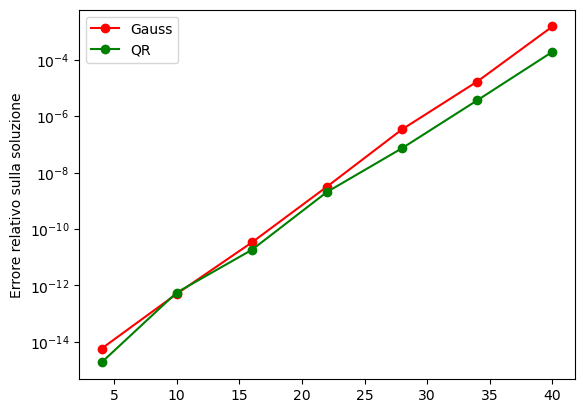

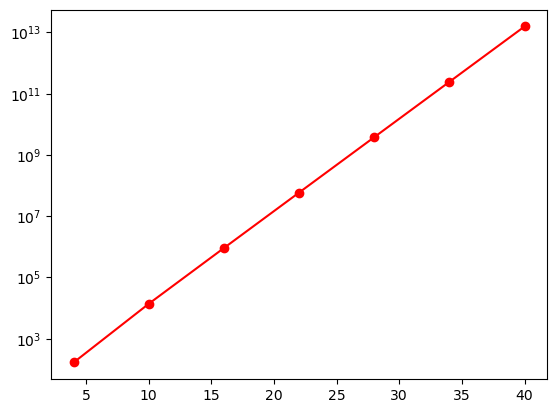

In [33]:
def Hankel(n):
    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for k in range(i+1-n,i+1):
            if k>0:
                A[i,n-1+k-i]=2.0**(k+1)
            else:
                A[i,n-1+k-i]=2.0**(1/(2-k-1))
    return A


indCond=[]
err_rel=[]
err_rel_qr=[]
for n in range(4,41,6):

   A=Hankel(n)
   indCond.append(np.linalg.cond(A,2))
   xesatta=np.ones((n,1))
   b=np.dot(A,xesatta)
   PT,L,U=lu(A)
   P=PT.T
   x,flag=LUsolve(P,A,L,U,b)
    
   err_rel.append(np.linalg.norm(x-xesatta,2)/np.linalg.norm(xesatta,2))
    
   
   Q,R=sp.linalg.qr(A)
   
   y=np.dot(Q.T,b)
   xqr,flag=Usolve(R,y)
   err_rel_qr.append(np.linalg.norm(xqr-xesatta,2)/np.linalg.norm(xesatta,2))
   
   
plt.semilogy(range(4,41,6),err_rel,'ro-',range(4,41,6),err_rel_qr,'go-')
plt.legend(['Gauss','QR'])
plt.ylabel('Errore relativo sulla soluzione')
plt.show()
plt.semilogy(range(4,41,6),indCond,'ro-')

#Si noti dall'andamento dell'errore relativo sulla soluzione,come spiegato in teoria, che il metodo QR è più stabile dell'algoritmo di Gauss 
#con pivotaggio

## Esercizio 8

Ripetere l'esercizio precedente per risolvere il sistema lineare $Ax = b$
con $A$ e $b$ cos\`i  definiti:
$$
a^{(n)}_{i,j}=
\left \{
\begin{array}{ll}
1 & \hbox{se} \ i=j \ \hbox{o \, se} \ j=n,\\
-1 & \hbox{se} \ i>j,\\
0 & \hbox{altrimenti}
\end{array}
\right .
\qquad
b = A \cdot [1, ..., 1]^T,
$$
per $n = 48 : 2 : 58$ e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Che
cosa si osserva?

In [20]:
def matrix(n):
    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for j in range(0,n):
            if i==j or j==n-1:
                A[i,j]=1
            elif i>j:
                A[i,j]=-1
            else:
                A[i,j]=0
    return A

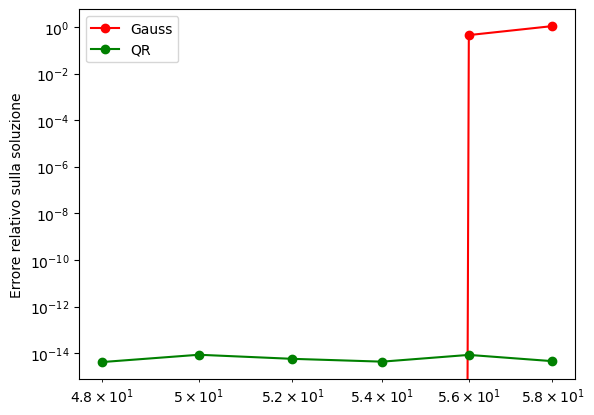

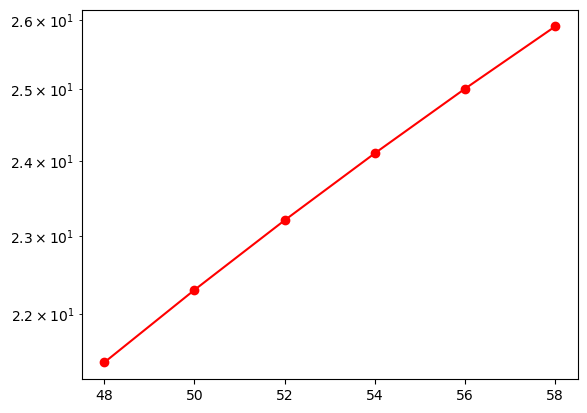

In [34]:
indCond=[]
err_rel=[]
err_rel_qr=[]
for n in range(48,59,2):

   A=matrix(n)
   indCond.append(np.linalg.cond(A,2))
   xesatta=np.ones((n,1))
   b=np.dot(A,xesatta)
   PT,L,U=lu(A)
   P=PT.T
   x,flag=LUsolve(P,A,L,U,b)
    
   err_rel.append(np.linalg.norm(x-xesatta,2)/np.linalg.norm(xesatta,2))
    
   
   Q,R=sp.linalg.qr(A)
   
   y=np.dot(Q.T,b)
   xqr,flag=Usolve(R,y)
   err_rel_qr.append(np.linalg.norm(xqr-xesatta,2)/np.linalg.norm(xesatta,2))
   
   
plt.loglog(range(48,59,2),err_rel,'ro-',range(48,59,2),err_rel_qr,'go-')
plt.legend(['Gauss','QR'])
plt.ylabel('Errore relativo sulla soluzione')
plt.show()
plt.semilogy(range(48,60,2),indCond,'ro-')

## Metodi iterativi di Jacobi, Guass-Seidel e Gausseidel_SOR per la soluzione numerica di un sistema lineare

## Esercizio 9
Implementare la  funzione $jacobi(A,b,x0,toll,itmax)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Jacobi. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [35]:
def jacobi(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    n=A.shape[0]
    invM=np.diag(1/d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    N=-(E+F)
    T=np.dot(invM,N)
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale jacobi", raggiospettrale)
    it=0
    
    er_vet=[]
    while it<=it_max and errore>=toll:
        x=(b+np.dot(N,x0))/d.reshape(n,1)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

## Esercizio 10
Implementare la  funzione $gauss$_$seidel(A,b,x0,toll,it_max)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [23]:
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=D+E
    N=-F
    T=np.dot(np.linalg.inv(M),N)
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<=it_max and errore>=toll:
        temp=b-F@x0
        x,flag=Lsolve(M,temp)  #Calcolare la soluzione al passo k equivale a calcolare la soluzione del sistema triangolare con matrice M=D+E
                               # e termine noto b-F@x0
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

## Esercizio 11
Testare i metodi di Jacobi e di Gauss Seidel nella soluzione dei sistemi lineare Ax=b, dove 
- A=np.array([[4,1,3],[3,4,1],[1,1,17]]) 
- A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
- A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])

ed il termine noto del sistema è scelto in maniera tale che la soluzione esatta del sistema sia il vettore fatto da tutti 1.
Visualizzare in un grafico in scala logaritmica  l'errore per ogni iterazione per ciascun metodo. Cosa si osserva?
Porre toll=1e-8 it_max=500 e x0=np.zeros(A.shape[0]

[[ 4  1  3]
 [ 3  4  1]
 [ 1  1 17]]
raggio spettrale jacobi 0.5586853131416272
sol=
  [[1.]
 [1.]
 [1.]] 
 it  35
raggio spettrale Gauss-Seidel  0.1943151503079159
solgs= 
 [[1.]
 [1.]
 [1.]] 
 it  13


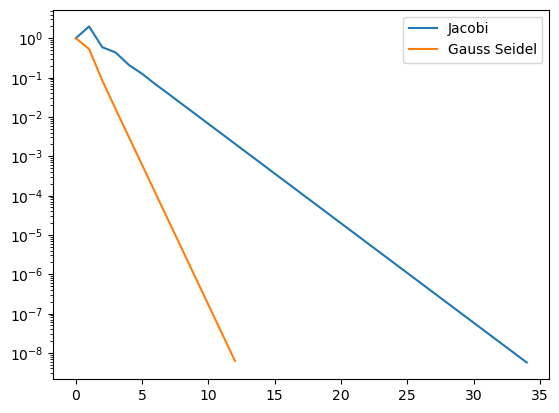

In [24]:
import matplotlib.pyplot as plt
from SolveTriangular import *
A=np.array([[4,1,3],[3,4,1],[1,1,17]])
print(A)
#A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
#A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])
toll=1e-8
it_max=100
n=A.shape[0]
x0=np.zeros(A.shape[0]).reshape(n,1)
b=np.sum(A,axis=1).reshape(n,1)
sol,it,err_vet=jacobi(A,b,x0,toll,it_max)
plt.semilogy(np.arange(it),err_vet)
print("sol=\n ",sol,"\n it ",it)

solgs,itgs,err_vet_gs=gauss_seidel(A,b,x0,toll,it_max)
print("solgs= \n",sol,"\n it ",itgs)
plt.semilogy(np.arange(itgs),err_vet_gs)
plt.legend(["Jacobi ", "Gauss Seidel"])
plt.show()

#Il raggio spettrale del metodo di Gauss-Seidel è più piccolo del raggio spettrale del metodo di Jacobi, questo giustifica il fatto che 
# il metodo di Gauss-Seidel è più veloce

## Esercizio 12
Implementare la  funzione $gauss$_$seidel$_sor(A,b,x0,omega, toll,itmax) per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel-SOR
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- omega: il parametro di rilassamento
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Restituisce in output
- la soluzione x
- l'errore ad ogni iterazione calcolato come $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [25]:
def gauss_seidel_sor(A,b,x0,toll,it_max,omega):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    Dinv=np.diag(1/d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    Momega=D+omega*E
    Nomega=(1-omega)*D-omega*F
    T=np.dot(np.linalg.inv(Momega),Nomega)
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)
    
    M=D+E
    N=-F
    it=0
    xold=x0.copy()
    xnew=x0.copy()
    er_vet=[]
    while it<=it_max and errore>=toll:
        temp=b-np.dot(F,xold)
        xtilde,flag=Lsolve(M,temp)
        xnew=(1-omega)*xold+omega*xtilde
        errore=np.linalg.norm(xnew-xold)/np.linalg.norm(xnew)
        er_vet.append(errore)
        xold=xnew.copy()
        it=it+1
    return xnew,it,er_vet

## Esercizio 13
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$
- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson di ordine 10 e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo di Jacobi, Gauss-Seidel e Gauss-Seidel-Sor con parametro omega scelto tra 1 e 2 in maniera tale che il raggio spettrale della matrice di iterazione sia il più piccolo possibile e confrontare su un unico grafico l'andamento degli errori in scala logaritmica. Usare toll=1e-10.

In [26]:
def creaPoisson(n):
    #costruire una matrice di Poisson
    d=np.ones((n))*4
    e=-np.ones((n-1,))
    f=-np.ones((n-3,))
    A=np.diag(d)+np.diag(e,-1)+np.diag(e,1)+np.diag(f,-3)+np.diag(f,3)
    return A
    

raggio spettrale jacobi 0.8451732757464308
raggio spettrale Gauss-Seidel  0.7185579379397853
raggio spettrale Gauss-Seidel SOR  0.5103393892922703


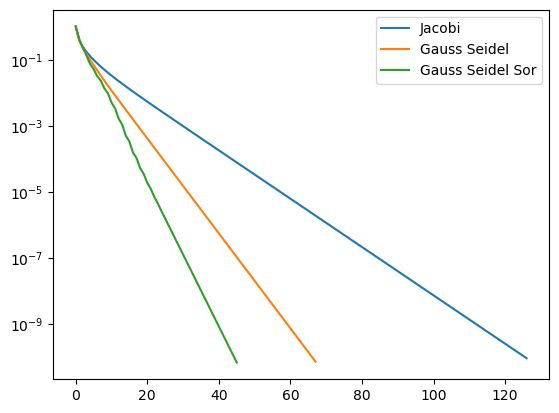

In [27]:
A=creaPoisson(10)
b=np.sum(A,axis=1)
toll=1e-10
it_max=1000
n=A.shape[0]
x0=np.zeros(A.shape[0]).reshape(n,1)
b=np.sum(A,axis=1).reshape(n,1)
sol_jac,it_jac,err_vet_jac=jacobi(A,b,x0,toll,it_max)
plt.semilogy(np.arange(it_jac),err_vet_jac)
#print("sol=",sol_jac,"it ",it_jac)
solgs,itgs,err_vet_gs=gauss_seidel(A,b,x0,toll,it_max)
#print("solgs=",solgs,"it ",itgs)
plt.semilogy(np.arange(itgs),err_vet_gs)
 
omega=1.4
solgs_sor,itgs_sor,err_vet_gs_sor=gauss_seidel_sor(A,b,x0,toll,it_max,omega)
#print("solgs_sor=",solgs_sor,"it ",itgs_sor)
plt.semilogy(np.arange(itgs_sor),err_vet_gs_sor)
plt.legend(['Jacobi','Gauss Seidel','Gauss Seidel Sor'])
plt.show()

#Si nota come a raggio spettrale più piccolo, corrisponde una magguire velocità (minor numero di iterazioni)